In [10]:
from utils.utils import cal_hv
import json
import numpy as np


def cal(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    test_result = data['test_result']
    objectives = []
    for value in test_result:
        objectives.append([value["normal_reject"], value["normal_cost"]])
    objectives = np.array(objectives)
    hv = cal_hv(objectives, np.array([1,1]))
    time = data["time_train"]
    return hv, time

def cal_algorithms(data_set):
    name_data = data_set[:-5]
    surrogate_path = "Test_result/Surrogate/" + data_set
    surrogate_hv = cal(surrogate_path)

    NSGAII_path = "Test_result/NSGAII/" + data_set
    NSGAII_hv = cal(NSGAII_path)

    MOEAD_path = "Test_result/MOEAD/" + data_set
    MOEAD_hv = cal(MOEAD_path)

    SPEA_path = "Test_result/SPEA/" + data_set
    SPEA_hv = cal(SPEA_path)
    return name_data, surrogate_hv, NSGAII_hv, MOEAD_hv, SPEA_hv



In [22]:
name_path = ["nsf_centers_easy_s3.json", "nsf_centers_hard_s3.json", "nsf_centers_normal_s3.json", "nsf_rural_easy_s3.json",
             "nsf_rural_normal_s3.json", "nsf_uniform_easy_s3.json", "nsf_uniform_normal_s3.json", "nsf_urban_easy_s3.json"]
name_data = []
surrogate_hv = []
NSGAII_hv = []
MOEAD_hv = []
SPEA_hv = []
surrogate_time = []
NSGAII_time = []
MOEAD_time = []
SPEA_time = []

for name in name_path:
    name, surrogate, NSGAII, MOEAD, SPEA = cal_algorithms(name)
    name_data.append(name)
    surrogate_hv.append(surrogate[0])
    surrogate_time.append(surrogate[1])
    NSGAII_hv.append(NSGAII[0])
    NSGAII_time.append(NSGAII[1])
    MOEAD_hv.append(MOEAD[0])
    MOEAD_time.append(MOEAD[1])
    SPEA_hv.append(SPEA[0])
    SPEA_time.append(SPEA[1])



In [52]:
temp1 = -(np.array(surrogate_time) - np.array(NSGAII_time) )/ np.array(NSGAII_time)*100
temp2 = -(np.array(surrogate_time) - np.array(MOEAD_time) )/ np.array(MOEAD_time)*100
temp3 = -(np.array(surrogate_time) - np.array(SPEA_time) )/ np.array(SPEA_time)*100
name_path = ["nsf_centers_easy_s3.json", "nsf_centers_hard_s3.json", "nsf_centers_normal_s3.json", "nsf_rural_easy_s3.json",
             "nsf_rural_normal_s3.json", "nsf_uniform_easy_s3.json", "nsf_uniform_normal_s3.json", "nsf_urban_easy_s3.json"]

field_name = ["Instance", "NSGAII-GP", "MOEAD-GP", "SPEA-GP"]

# save to csv
import csv
with open('Test_result/NSGAII_MOEAD_SPEA_time.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(field_name)
    for i in range(len(name_path)):
        writer.writerow([name_path[i][:-5], round(temp1[i],2), round(temp2[i], 2), round(temp3[i],2)])

In [23]:
print(name_data)
print(surrogate_hv)
print(NSGAII_hv)
print(MOEAD_hv)
print(SPEA_hv)

['nsf_centers_easy_s3', 'nsf_centers_hard_s3', 'nsf_centers_normal_s3', 'nsf_rural_easy_s3', 'nsf_rural_normal_s3', 'nsf_uniform_easy_s3', 'nsf_uniform_normal_s3', 'nsf_urban_easy_s3']
[0.13780755982929685, 0.1693480220016643, 0.1569841105586392, 0.27874941558291566, 0.26604307499548163, 0.2450211031402843, 0.2717638537807616, 0.27972949999139524]
[0.13808024319038514, 0.1713519469816655, 0.15750821597847536, 0.28191717494469165, 0.26420659584176465, 0.24930813881353167, 0.2723974815750711, 0.2820152521139591]
[0.13746771978169842, 0.17040262126516675, 0.1525861951215908, 0.2824765718213957, 0.2655037988686063, 0.25017259005164794, 0.2711799709040811, 0.2832317315212495]
[0.12700343536811304, 0.16069554916710704, 0.15018073383639213, 0.2687194823775061, 0.25256442876484003, 0.23395302417091796, 0.2591558453236748, 0.26905511945113403]


In [34]:
# from matplotlib import pyplot as plt
# name_data = ["1", "2", "3", "4", "5", "6", "7", "8"]
# plt.plot(name_data, surrogate_hv, label='Surrogate')
# plt.plot(name_data, NSGAII_hv, label='NSGAII')
# plt.plot(name_data, MOEAD_hv, label='MOEAD')
# plt.plot(name_data, SPEA_hv, label='SPEA')
# plt.legend()

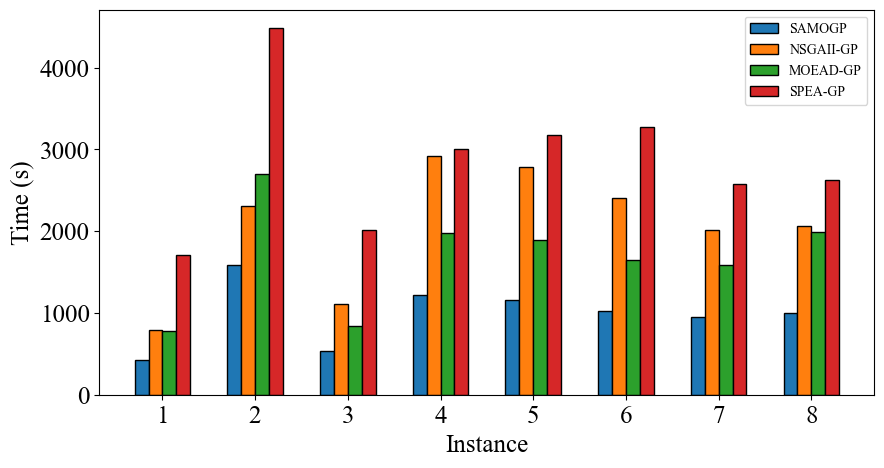

In [54]:
import matplotlib.pyplot as plt

#set font Time New roman
plt.rcParams["font.family"] = "Times New Roman"
# Số lượng nhóm
num_groups = len(name_data)

# Độ rộng của mỗi cột
bar_width = 0.15

# Vị trí của các cột trên trục x
index = range(num_groups)
plt.figure(figsize=(10, 5))
# Vẽ biểu đồ cột
plt.bar(index, surrogate_time, bar_width, label='SAMOGP', edgecolor='black')
plt.bar([i + bar_width for i in index], NSGAII_time, bar_width, label='NSGAII-GP', edgecolor='black')
plt.bar([i + 2 * bar_width for i in index], MOEAD_time, bar_width, label='MOEAD-GP',  edgecolor='black')
plt.bar([i + 3 * bar_width for i in index], SPEA_time, bar_width, label='SPEA-GP', edgecolor='black')

# Đặt tên cho trục x và trục y
plt.xlabel('Instance', fontsize = 18)
plt.ylabel('Time (s)', fontsize = 18)

# Đặt tên cho các nhóm trên trục x
# plt.xticks([i + 1.5 * bar_width for i in index], name)
name_data = ["1", "2", "3", "4", "5", "6", "7", "8"]
plt.xticks([i +  1.5 * bar_width for i in index], name_data, fontsize = 18) 
plt.yticks(fontsize = 18)


# Thêm chú thích
plt.legend()
# Hiển thị biểu đồ


plt.show()

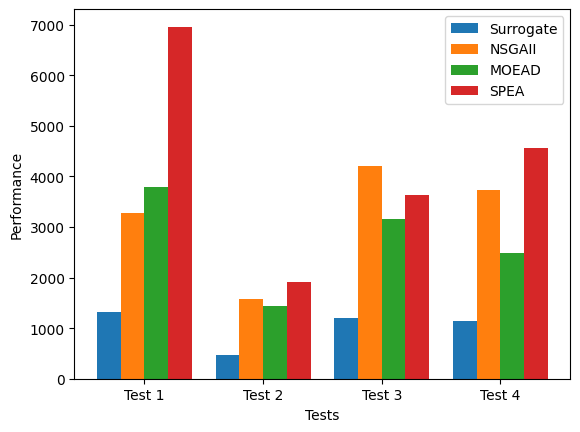

In [3]:
import matplotlib.pyplot as plt

# Dữ liệu
surrogate_time = [1314.6013622283936, 466.3978068828583, 1200.8083612918854, 1137.0659022331238 ]
NSGAII_time = [3280.8819234371185, 1583.058861732483, 4213.758901357651, 3730.620888710022]
MOEAD_time = [3798.5264599323273, 1444.9109947681427, 3161.6057567596436, 2485.965169906616]
SPEA_time = [6956.865525007248, 1918.3201296329498, 3623.9244561195374, 4569.5873503685  ]

name = ["Test 1", "Test 2", "Test 3", "Test 4"]

# Số lượng nhóm
num_groups = len(name)

# Độ rộng của mỗi cột
bar_width = 0.2

# Vị trí của các cột trên trục x
index = range(num_groups)

# Vẽ biểu đồ cột
plt.bar(index, surrogate_time, bar_width, label='Surrogate')
plt.bar([i + bar_width for i in index], NSGAII_time, bar_width, label='NSGAII')
plt.bar([i + 2 * bar_width for i in index], MOEAD_time, bar_width, label='MOEAD')
plt.bar([i + 3 * bar_width for i in index], SPEA_time, bar_width, label='SPEA')

# Đặt tên cho trục x và trục y
plt.xlabel('Tests')
plt.ylabel('Performance')

# Đặt tên cho các nhóm trên trục x
plt.xticks([i + 1.5 * bar_width for i in index], name)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()
